
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [57]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [58]:
# Load data and inspect
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [59]:
# Inspect dimensions
df.shape

(10866, 21)

<b>There are 10866 rows and 21 columns of data in this dataset</b>

In [60]:
# Inspect data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<b>The data types present are: integer, float, and "object" which are most likely strings</b>

In [61]:
# Look for columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [62]:
#Find out how many movies are missing 
sum(pd.isnull(df['cast']))

76

<b>It looks like the columns that have missing values are: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.  Only the cast column will be used in the analysis, so the 76 movies missing values for "cast" will be dropped during cleaning.</b>

In [63]:
# Check for duplicate entries
sum(df.duplicated())

1

<b>One entry has been duplicated and will need to be removed during cleaning.</b>

In [64]:
missing_revenue = (df['revenue_adj'] == 0).sum()
missing_budget = (df['budget_adj'] == 0).sum()

print("There are {} movies with no reported revenue and {} movies with no reported budget.".format(missing_revenue, missing_budget))

There are 6016 movies with no reported revenue and 5696 movies with no reported budget.


<b>Movies with no reported revenue or budget will not be counted in an actor's overall film total when calculating average totals.

### Data Cleaning (Replace this with more specific notes!)

- Remove duplicate entry

In [65]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

<b>From this I can see that the vote_average has a nice distribution.  The other categories that I am interested in (popularity, vote_count, budget_adj and revenue_adj will require more investigation to find meaningful information.</b>

- Remove columns not needed for analysis

In [66]:
# Drop unnecessary columns
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'release_year'], axis='columns', inplace=True)

#Ensure changes were made properly
df.head(1)

,id,popularity,original_title,cast,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,5562,6.5,1.379999e+08,1.392446e+09


- Remove movies where no cast members are listed

In [67]:
#Drop null values for "cast"
df = df.dropna(subset=['cast'])

#Check that current number of rows shows that the 76 movies with null cast values and  
# 1 duplicate row have been removed from the original dataset (10866 - 77 = 10789)
df.shape

(10789, 8)

In [68]:
#Drop movies where no 

- Create a new dataframe with each actor in a movie on a seperate line

In [69]:
# Create new dataset with each actor listed on a separate line
df_expanded= df.assign(cast=df['cast'].str.split('|')).explode('cast')

#Rename "cast" column as "actor"
df_expanded.rename(columns={'cast':'actor'}, inplace=True)

#Ensure changes were made properly
df_expanded.head(1)          

,id,popularity,original_title,actor,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt,5562,6.5,1.379999e+08,1.392446e+09


- Create a profit column

In [70]:
df_expanded['profit'] = df_expanded['revenue_adj'] - df_expanded['budget_adj']

df_expanded.head(1)

,id,popularity,original_title,actor,vote_count,vote_average,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09


- Create functions to be used in data analysis

In [71]:
#Create a function that will return the total amount in dolars for each actor
def total_dollars(data, dollar_amt, actor):
    total_amount_by_actor = data.groupby(actor).sum().dollar_amt
    return total_amount_by_actor

In [72]:
#Create a function that will average total amounts by the number of movies with reported dollar amounts
def average_total(data, dollar_amt, actor):
    total_amount_by_actor = data.groupby(actor).sum().dollar_amt
    films_by_actor = data[data[dollar_amt] > 0].groupby(actor)[dollar_amt].count()
    average_amount_by_actor = total_amount_by_actor/films_by_actor
    return average_amount_by_actor

In [73]:
#Create a function that will sort a list and return the top n entries based on dollar amounts
def top_dollars(data, n):
    top_sorted_amount = data.nlargest(n)
    return top_sorted_amount

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What actors' films have grossed the most at the box office?

- First a look at the actors total box office revenue for all movies in dataset

In [74]:
#Sum the adj_revenue for each actor
#revenue_by_actor = df_expanded.apply(lambda x: total_dollars(df_expanded, x['revenue_adj'], x['actor']), axis=0)
#revenue_by_actor = total_dollars(data = df_expanded, dollar_amt ='revenue_adj', actor = 'actor')
revenue_by_actor = total_dollars(df_expanded, df_expanded['revenue_adj'], df_expanded['actor'])
revenue_by_actor.head()
#Sort list to show the top 20 grossing actors
#top_revenue_by_actor = top_dollars(revenue_by_actor, 20)
#top_revenue_by_actor

AttributeError: 'DataFrame' object has no attribute 'dollar_amt'

In [19]:
#Plot of the top 20 grossing actors
top_revenue_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Highest Grossing Movies",fontsize=15)
plt.xlabel('Total Box Office Revenue for All Movies',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

NameError: name 'top_revenue_by_actor' is not defined

- Now a look at who grosses the most on average

In [41]:
#Calculate average grossed per film based on the number of films (not counting films with no reported revenue)
films_by_actor = df_expanded[df_expanded['revenue_adj'] > 0].groupby('actor')['revenue_adj'].count()
average_revenue_by_actor = revenue_by_actor/films_by_actor

#Sort list to show the average top 20 grossing actors
highest_ravg_by_actor = average_revenue_by_actor.nlargest(20)
highest_ravg_by_actor

actor
Daisy Ridley              1.902723e+09
Robert MacNaughton        1.791694e+09
Ken Howard                1.583050e+09
Ben Wright                1.574815e+09
Betty Lou Gerson          1.574815e+09
J. Pat O'Malley           1.574815e+09
Martha Wentworth          1.574815e+09
Peter Cushing             1.416328e+09
Bob Peck                  1.388863e+09
Louis Prima               1.345551e+09
Sebastian Cabot           1.345551e+09
Anthony Daniels           1.339223e+09
Richard S. Castellano     1.277914e+09
Mark Hamill               1.233071e+09
Idina Menzel              1.192711e+09
Jonathan Groff            1.192711e+09
Santino Fontana           1.192711e+09
Jonathan Taylor Thomas    1.159592e+09
Eleanor Parker            1.129535e+09
Peggy Wood                1.129535e+09
Name: revenue_adj, dtype: float64

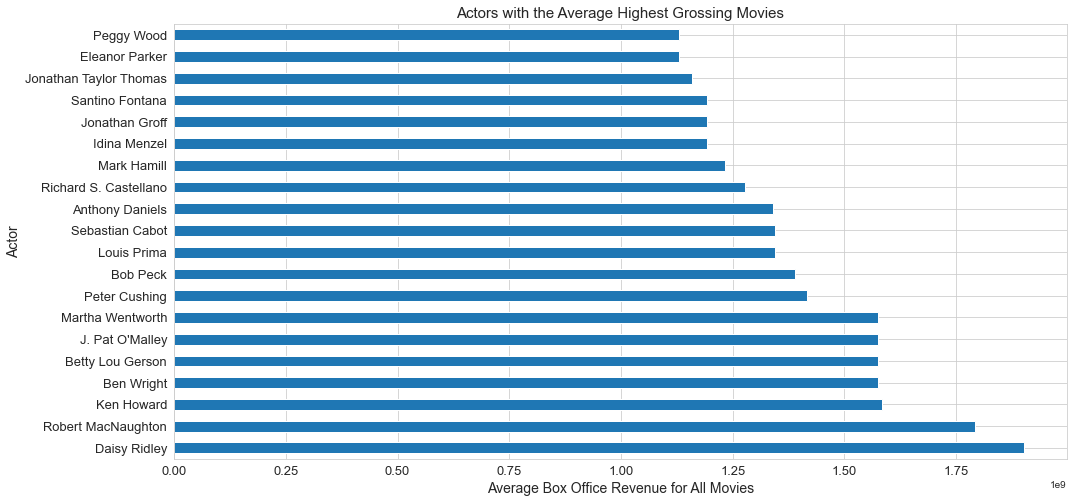

In [42]:
#Plot of the average top 20 grossing actors
highest_ravg_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Average Highest Grossing Movies",fontsize=15)
plt.xlabel('Average Box Office Revenue for All Movies',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

### Research Question 2: Which actors' films have cost the most to make?

- First look at the overall cost for all movies by actor

In [43]:
#Sum the budget_adj for each actor
budget_by_actor = df_expanded.groupby('actor').sum().budget_adj

#Sort list to show the top 20 actors based on the amount spent on all movies
top_budget_by_actor = budget_by_actor.nlargest(20)
top_budget_by_actor

actor
Bruce Willis             3.352545e+09
Johnny Depp              3.279811e+09
Nicolas Cage             2.872865e+09
Robert De Niro           2.871290e+09
Samuel L. Jackson        2.865955e+09
Tom Cruise               2.813303e+09
Eddie Murphy             2.783234e+09
Harrison Ford            2.560277e+09
Brad Pitt                2.519644e+09
Arnold Schwarzenegger    2.415107e+09
Tom Hanks                2.355921e+09
Will Smith               2.328549e+09
Angelina Jolie           2.277462e+09
Sylvester Stallone       2.233235e+09
Gary Oldman              2.233113e+09
Matt Damon               2.228762e+09
Hugh Jackman             2.173286e+09
Robin Williams           2.124843e+09
Ian McKellen             2.075085e+09
Cameron Diaz             2.061835e+09
Name: budget_adj, dtype: float64

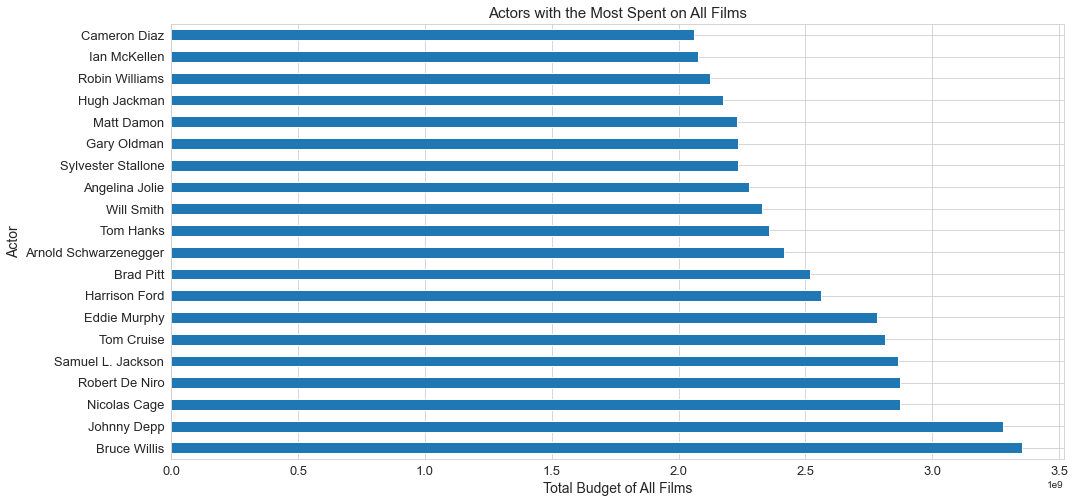

In [44]:
#Plot of the top 20 actors by total film cost
top_budget_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Most Spent on All Films",fontsize=15)
plt.xlabel('Total Budget of All Films',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

- Now a look at the average cost per film for each actor

In [45]:
#Calculate average cost per film based on the number of films (not counting films with no reported budget)
films_by_actor = df_expanded[df_expanded['budget_adj'] > 0].groupby('actor')['budget_adj'].count()
average_budget_by_actor = budget_by_actor/films_by_actor

#Sort list to show the top 20 actors with highest cost per movie on average
highest_bavg_by_actor = average_budget_by_actor.nlargest(20)
highest_bavg_by_actor

actor
Jang Dong-gun       4.250000e+08
Ti Lung             4.250000e+08
Donna Murphy        2.600000e+08
Chaim Girafi        2.504192e+08
R. D. Call          2.504192e+08
Rick Aviles         2.504192e+08
Zitto Kazann        2.504192e+08
Ken Stott           2.321406e+08
Rosemary Harris     2.308891e+08
William Moseley     2.144292e+08
Clive Russell       2.094485e+08
Daniel Southern     2.094485e+08
Dennis StorhÃ¸i     2.094485e+08
Vladimir Kulich     2.094485e+08
Sage Ryan           2.032801e+08
Steve Valentine     2.032801e+08
Georgie Henley      1.946195e+08
Skandar Keynes      1.946195e+08
Abigail Hargrove    1.872067e+08
Joel Murray         1.872067e+08
Name: budget_adj, dtype: float64

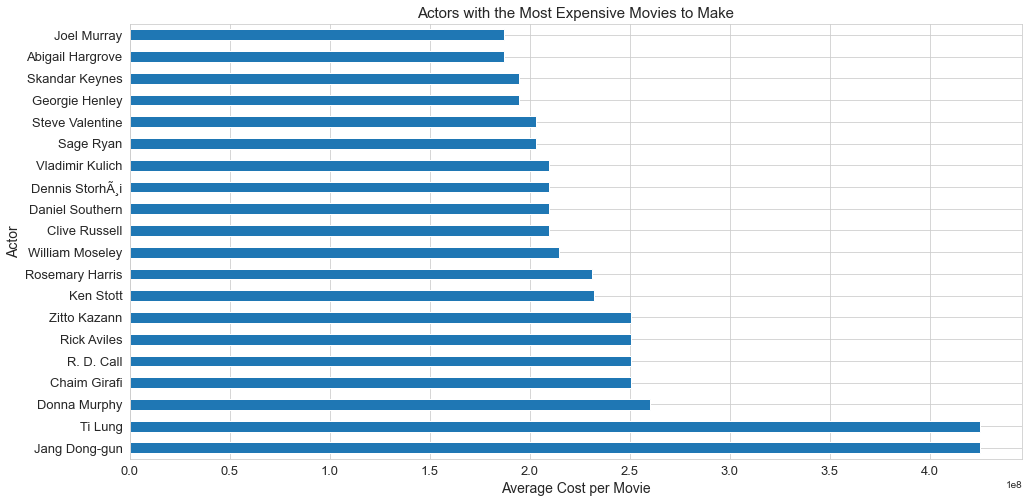

In [46]:
#Plot of the top 20 actors by film cost
highest_bavg_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Most Expensive Movies to Make",fontsize=15)
plt.xlabel('Average Cost per Movie',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

### Research Question 3: Does a higher cost movie result in higher profits?

- 

In [47]:

actor_totals = df_expanded.groupby(by = ['actor'], as_index=False).agg({'budget_adj':'sum', 'profit':'sum'})
highest_actor_totals = actor_totals.nlargest(100, 'budget_adj')
highest_actor_totals


,actor,budget_adj,profit
2508,Bruce Willis,3.352545e+09,4.900506e+09
9167,Johnny Depp,3.279811e+09,5.284713e+09
13621,Nicolas Cage,2.872865e+09,2.847799e+09
15340,Robert De Niro,2.871290e+09,3.743079e+09
16078,Samuel L. Jackson,2.865955e+09,5.111121e+09
...,...,...,...
3454,Christopher Walken,1.282782e+09,1.648178e+09
12628,Michael Douglas,1.276916e+09,3.127340e+09
1174,Anne Hathaway,1.273742e+09,4.386218e+09
3205,Chris Hemsworth,1.264480e+09,3.139742e+09


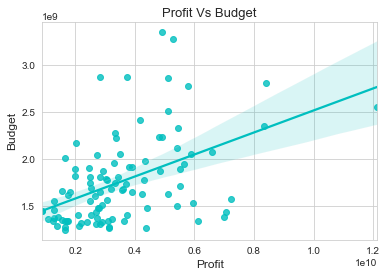

In [48]:
#Scatterplot of profit vs budget 

at_plot = sns.regplot(x=highest_actor_totals['profit'], y=highest_actor_totals['budget_adj'],color='c')
at_plot.set_title("Profit Vs Budget",fontsize=13)
at_plot.set_xlabel("Profit",fontsize=12)
at_plot.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

- Compare total profits to the average amout spent on a movie

In [51]:
#Calc avg bugget/profit by actor

In [ ]:
#Create a function that will average total amounts by the number of movies with reported dollar amounts
def average_total(data, dollar_amt, actor):
    total_amount_by_actor = data.groupby(actor).sum().dollar_amt
    films_by_actor = data[data[dollar_amt] > 0].groupby(actor)[dollar_amt].count()
    average_amount_by_actor = total_amount_by_actor/films_by_actor
    return average_amount_by_actor


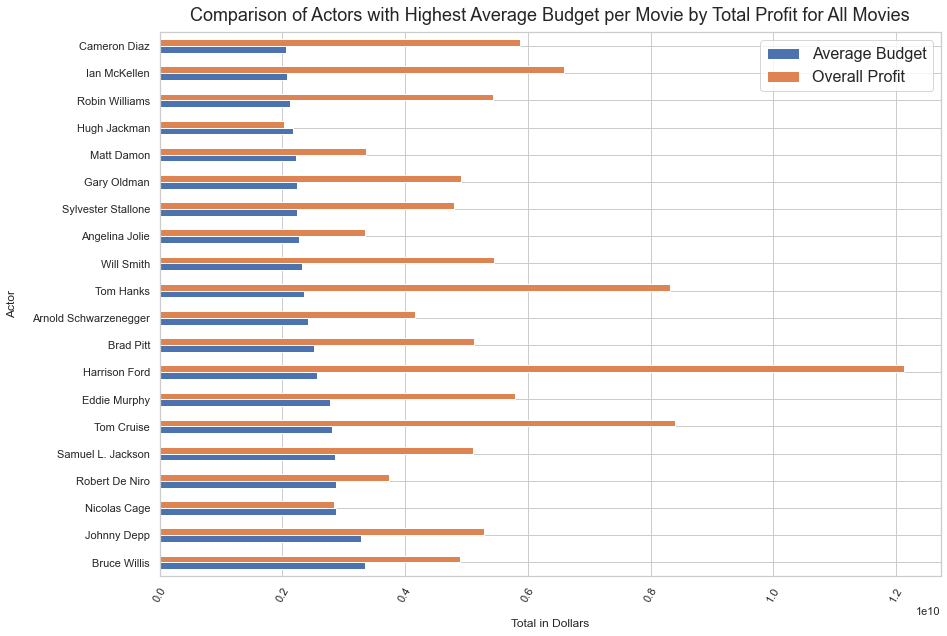

In [50]:
highest_actor_totals = actor_totals.nlargest(20, 'budget_adj')
highest_actor_totals.set_index('actor')[['budget_adj', 'profit']].plot(kind='barh', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Comparison of Actors with Highest Average Budget per Movie by Total Profit for All Movies", fontsize=18, y=1.01)
plt.xlabel("Total in Dollars", labelpad=15)
plt.ylabel("Actor", labelpad=15)
plt.legend(["Average Budget", "Overall Profit"], fontsize=16);


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!